In [3]:
import matplotlib.pyplot as plt
import numpy as np

Saving Evaluation Performance Multiscale Plot


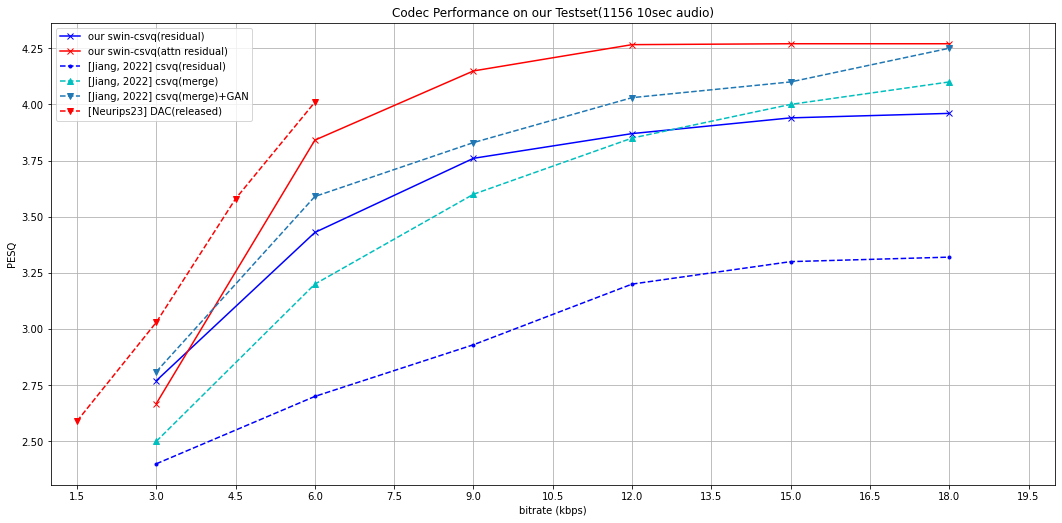

In [17]:
print("Saving Evaluation Performance Multiscale Plot")
csvq_residual = np.array([2.4, 2.7, 2.93, 3.2, 3.3, 3.32])
csvq_merge = np.array([2.5, 3.2, 3.6, 3.85, 4.0, 4.1])
csvq_merge_gan = np.array([2.81, 3.59, 3.83, 4.03, 4.1, 4.25])


dac = np.array([2.59, 3.03, 3.58, 4.01])
dac_bps = np.array([1.5, 3, 4.5, 6])

swin_csvq_residual = np.array([2.77, 3.43, 3.76, 3.87, 3.94, 3.96])
swin_csvq_residual_norm_attn = np.array([2.668, 3.841, 4.149, 4.266, 4.27, 4.27])
swin_csvq_residual_w_attn = np.array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

swin_wfuse_9k = [2.259, 4.302, 4.357, 4.363, 4.362, 4.363]

swin_csvq_residual_sw_attn = np.array([3.3, 3.3, 3.3, 3.3, 3.3, 3.3])

plt.figure(figsize=(18,8.5))
plt.title("Codec Performance on our Testset(1156 10sec audio)")
plt.xlim((1,20))
plt.xticks(np.arange(1.5,21,1.5))
plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual), marker='x', color='blue', label="our swin-csvq(residual)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_norm_attn), marker='x', color='red', label="our swin-csvq(attn residual)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_w_attn), marker='x', color='green', label="our swin-csvq(W-attn residual)")
# plt.plot(np.array([b*3.0 for b in range(1, 7)]), np.array(swin_csvq_residual_sw_attn), marker='x', color='purple', label="our swin-csvq(SW-attn residual)")

plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_residual, linestyle='--', marker='.', color='blue', label="[Jiang, 2022] csvq(residual)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge, linestyle='--', marker='^', color='c', label="[Jiang, 2022] csvq(merge)")
plt.plot(np.array([b*3.0 for b in range(1, 7)]), csvq_merge_gan, linestyle='--', marker='v', color='tab:blue', label="[Jiang, 2022] csvq(merge)+GAN")


plt.plot(dac_bps, dac, linestyle='--', marker='v', color='red', label="[Neurips23] DAC(released)")

plt.xlabel("bitrate (kbps)")
plt.ylabel("PESQ")
plt.grid()
plt.legend()
# plt.savefig(f"../assets/test_result_curve.jpg", dpi=200, bbox_inches='tight', pad_inches=.5)

plt.show()